<a href="https://www.kaggle.com/code/rinichristy/natural-language-processing-restaurant-review?scriptVersionId=90599684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Natural Language Processing of Restaurant Review**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**

In [2]:
ds = pd.read_csv('../input/restaurantreviews/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) # Quoting = 3 for removing quotes
ds

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## **Exploratory Data Analysis & Data Visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


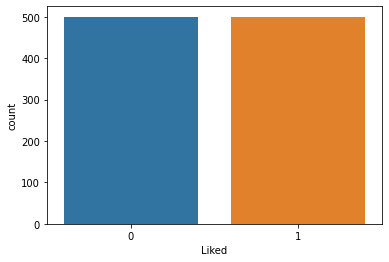

In [3]:
sns.countplot(ds['Liked']);

In [4]:
len(ds[ds['Review'].duplicated()])

4

In [5]:
ds.groupby(('Liked')).describe().T

Liked                               0                   1
Review count                      500                 500
       unique                     497                 499
       top     The food was terrible.  I love this place.
       freq                         2                   2

## **WordCloud**

Explore the data by label groups by creating a WordCloud. First, create a separate dataframe for 'Liked = 1' and 'Liked = 0' reviews and convert it to numpy array to generate WordCloud.

In [6]:
# Get all the Liked = 1 and Liked = 0 reviews
Review_0 = ds[ds.Liked ==0]
Review_1 = ds[ds.Liked==1]
# Create numpy list to visualize using wordcloud
Review_0_text = " ".join(Review_0.Review.to_numpy().tolist())
Review_1_text = " ".join(Review_1.Review.to_numpy().tolist())

To visualize using WordCloud(), words most commonly found in reviews are extracted, meaningless stop words such as “the”, “a” , “is” etc are removed, and plot it. The WordCloud visualizes the most frequent words in the given text.

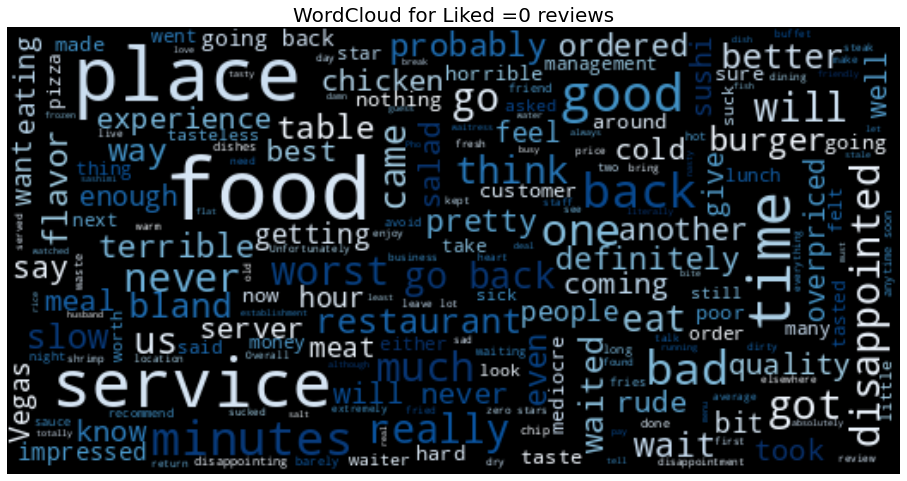

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of Liked =0 reviews
Review_0_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(Review_0_text)
plt.figure(figsize=(16,10))
plt.imshow(Review_0_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for Liked =0 reviews", fontsize = 20)
plt.show()

The Liked =0 WordCloud above shows that “disappointed”, “never”, “worst”, “bad”, "terrible" “rude” etc. are the most commonly appeared word in Liked =1 reviews.

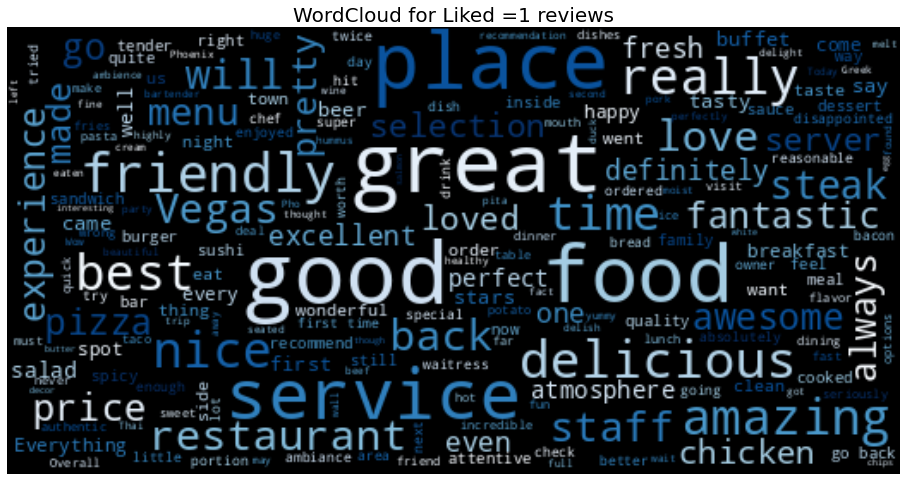

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of Liked =1 reviews
Review_1_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(Review_1_text)
plt.figure(figsize=(16,10))
plt.imshow(Review_1_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for Liked =1 reviews", fontsize = 20)
plt.show()

The Liked =1 WordCloud above shows that “good”, “delicious”, “friendly”, “great”, "fantastic" “awesome” etc. are the most commonly appeared word in Liked =1 reviews.

## **Creating the Bag of Words model**

### **Cleaning the texts**

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', ds['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwh

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = ds.iloc[:, -1].values

### **Fitting the Naive Bayes Classifier to the  Count vectorized Bag of words (BOW)**

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

### **Evaluation Metrics**

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Naive Bayes Model is ', accuracy_score(y_test, y_pred))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,y_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,y_pred))

Accuracy of NLP Naive Bayes Model is  0.73

 Confusion Matrix:
 [[55 42]
 [12 91]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



### **Predicting if a single review is positive or negative**

**Positive review**

Use the above model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** Just repeat the same text preprocessing process as before, but this time with a single review.

In [13]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by the above model.

**Negative review**

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [14]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


### **Using Some Other Classifiers**

Evaluation can be done using any classifiers like MultinomialNB classifier (from sklearn.naive_bayes import MultinomialNB), or RandomForestClassifier (from sklearn.ensemble import RandomForestClassifier) or SGDClassifier (from sklearn.linear_model import SGDClassifier) etc.

Now we have a classification report for our model on a true testing set! We can compare the results using different classifiers.

In [15]:
#Support Vector classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP SVC Model is ', accuracy_score(y_test, y_pred))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,y_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,y_pred))

Accuracy of NLP SVC Model is  0.78

 Confusion Matrix:
 [[89  8]
 [36 67]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        97
           1       0.89      0.65      0.75       103

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.81      0.78      0.78       200



In [16]:
#DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLTP Decision Tree Classifier Model is ', accuracy_score(y_test, y_pred))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,y_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,y_pred))

Accuracy of NLTP Decision Tree Classifier Model is  0.71

 Confusion Matrix:
 [[75 22]
 [36 67]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        97
           1       0.75      0.65      0.70       103

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [17]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Random Forest Classifier Model is ', accuracy_score(y_test, y_pred))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,y_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,y_pred))

Accuracy of NLP Random Forest Classifier Model is  0.76

 Confusion Matrix:
 [[89  8]
 [40 63]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        97
           1       0.89      0.61      0.72       103

    accuracy                           0.76       200
   macro avg       0.79      0.76      0.76       200
weighted avg       0.79      0.76      0.75       200



In [18]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Random Forest Classifier Model is ', accuracy_score(y_test, y_pred))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,y_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,y_pred))

Accuracy of NLP Random Forest Classifier Model is  0.775

 Confusion Matrix:
 [[80 17]
 [28 75]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        97
           1       0.82      0.73      0.77       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



## **Creating a Data Pipeline**

Run the model again and then predict off the test set.This time using SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow one to set up all the transformations that will be done to the data for future use. Remember this pipeline has all the pre-process steps in it

### **Using Text Processing**
**Import TfidfTransformer from sklearn.**

**Import Pipeline from sklearn.**

**Then create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [19]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
    # Now just remove any stopwords
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in all_stopwords]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Using the Pipeline**

Now directly pass message text data and the pipeline will do our pre-processing for the user!

In [20]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## **Splitting the original dataset into the Training set and Test set**

In [21]:
X = ds['Review']
y = ds['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model is ', accuracy_score(y_test, predictions))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Accuracy of NLP Pipeline Model is  0.81

 Confusion Matrix:
 [[80 17]
 [21 82]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        97
           1       0.83      0.80      0.81       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Evaluation can be done using any classifiers like MultinomialNB classifier (from sklearn.naive_bayes import MultinomialNB), or RandomForestClassifier (from sklearn.ensemble import RandomForestClassifier) or SGDClassifier (from sklearn.linear_model import SGDClassifier) etc. 

In [22]:
#Support Vector classifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline_SVC = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector classifier
])
pipeline_SVC.fit(X_train,y_train)
predictions_SVC = pipeline_SVC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model with SVC is ', accuracy_score(y_test, predictions_SVC))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,predictions_SVC))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions_SVC))

Accuracy of NLP Pipeline Model with SVC is  0.805

 Confusion Matrix:
 [[84 13]
 [26 77]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.86      0.75      0.80       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [23]:
#DecisionTree classifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
pipeline_DTC = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ Support Vector classifier
])
pipeline_DTC.fit(X_train,y_train)
predictions_DTC = pipeline_DTC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model with DecisionTree Classifier is ', accuracy_score(y_test, predictions_DTC))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,predictions_DTC))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions_DTC))

Accuracy of NLP Pipeline Model with DecisionTree Classifier is  0.755

 Confusion Matrix:
 [[80 17]
 [32 71]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.77        97
           1       0.81      0.69      0.74       103

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



In [24]:
# Random Forest classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline_RFC = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Support Vector classifier
])
pipeline_RFC.fit(X_train,y_train)
predictions_RFC = pipeline_RFC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model with RandomForest Classifier is ', accuracy_score(y_test, predictions_RFC))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,predictions_RFC))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions_RFC))

Accuracy of NLP Pipeline Model with RandomForest Classifier is  0.805

 Confusion Matrix:
 [[92  5]
 [34 69]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83        97
           1       0.93      0.67      0.78       103

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.80       200
weighted avg       0.83      0.81      0.80       200



In [25]:
# LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline_LR = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Support Vector classifier
])
pipeline_LR.fit(X_train,y_train)
predictions_LR = pipeline_LR.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model with LogisticRegression is ', accuracy_score(y_test, predictions_LR))
print('\n','Confusion Matrix:' '\n', confusion_matrix(y_test,predictions_LR))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions_LR))

Accuracy of NLP Pipeline Model with LogisticRegression is  0.82

 Confusion Matrix:
 [[84 13]
 [23 80]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.82        97
           1       0.86      0.78      0.82       103

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

